In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pickle

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv("/config/workspace/insurance_main_dataset.csv")

In [6]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [16]:
df['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [13]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
df.iloc[:,1] = label.fit_transform(df.iloc[:,1])
df.iloc[:,5] = label.fit_transform(df.iloc[:,5])
df.iloc[:,4] = label.fit_transform(df.iloc[:,4])

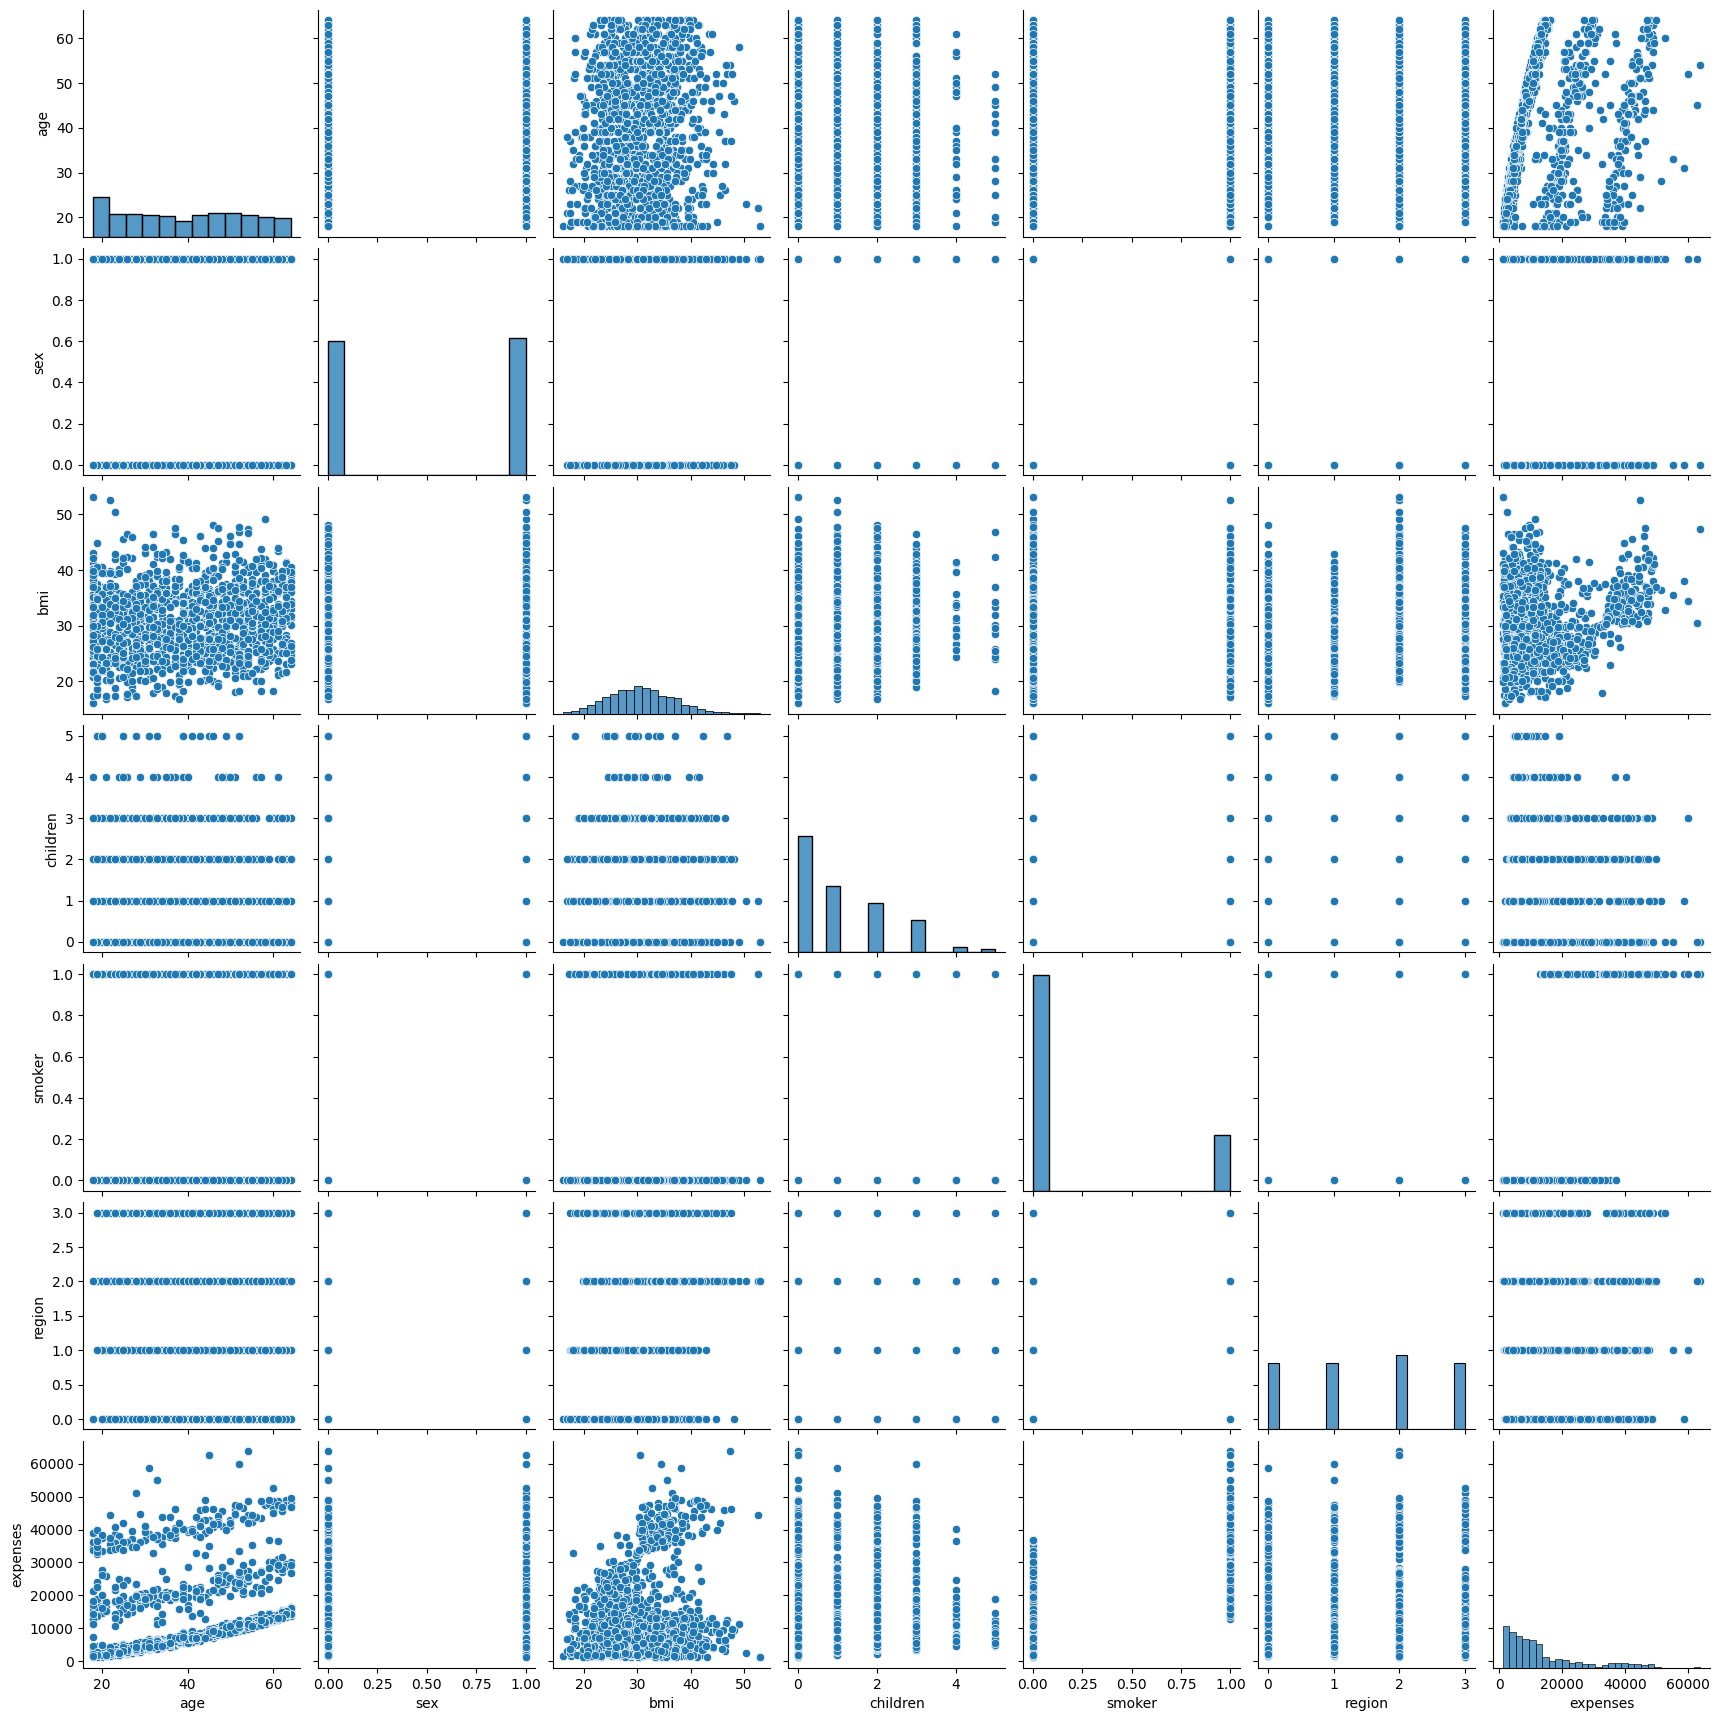

In [15]:
sns.pairplot(df)

In [16]:
X = df[['bmi','age','smoker','children']]
Y = df['expenses']

In [19]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
X_train,X_test,y_train,y_test = sklearn.model_selection.train_test_split(X,Y,test_size=0.25)

In [20]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
regressor = DecisionTreeRegressor(random_state=0)
#cross_val_score(regressor, X_train, y_train, cv=10)
regressor.fit(X_train, y_train)
y_predict = regressor.predict(X_test)
mse_dt = mean_squared_error(y_test,y_predict,squared=False)
print(mse_dt)

6745.633619603416


In [21]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
#cross_val_score(regressor, X_train, y_train, cv=10)
regressor.fit(X_train, y_train)
y_predict = regressor.predict(X_test)
mse_dt = mean_squared_error(y_test,y_predict,squared=False)
print(mse_dt)

5518.880996309687


In [22]:
import pickle
pickle.dump(regressor, open('model.pkl','wb'))

model = pickle.load(open('model.pkl','rb'))